In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

import gym
import mazelab

import torch as th

from stable_baselines3 import PPO, A2C
from imitation.rewards.discrim_net import DiscrimNetAIRL

In [2]:
env = gym.make('EmptyMaze-10x10-FixedGoal-v0')

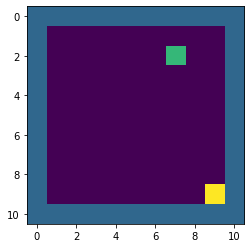

In [3]:
plt.imshow(env.reset())

In [4]:
discrim = th.load('../../imitation/output/train_adversarial/mazelab:EmptyMaze-10x10-FixedGoal-v0/20200730_192824_ddbeaf/checkpoints/final/discrim.pt')
model = PPO.load('../agents/ppo/EmptyMaze-10x10-FixedGoal-v0_1/best_model.zip')


In [5]:
images = []
for n in range(30):
    obs = env.reset()
    for _ in range(1000):
        action, _states = model.predict(obs, deterministic=False)
        obs, reward, done, info = env.step(action)
        if done:
            break
        frame = env.get_image()
        images.append(frame)

imageio.mimsave(f'tmp/PPO-EmptyMaze-v0-rollout.gif', images, fps=29)
Image(filename=f"tmp/PPO-EmptyMaze-v0-rollout.gif", width=110, height=110)

In [6]:
discrim

DiscrimNetAIRL(
  (reward_net): BasicShapedRewardNet(
    (_base_reward_net): BasicRewardMLP(
      (mlp): Sequential(
        (flatten): Flatten()
        (dense0): Linear(in_features=125, out_features=32, bias=True)
        (act0): ReLU()
        (dense1): Linear(in_features=32, out_features=32, bias=True)
        (act1): ReLU()
        (dense_final): Linear(in_features=32, out_features=1, bias=True)
        (squeeze): SqueezeLayer()
      )
    )
    (_potential_net): Sequential(
      (flatten): Flatten()
      (dense0): Linear(in_features=121, out_features=32, bias=True)
      (act0): ReLU()
      (dense1): Linear(in_features=32, out_features=32, bias=True)
      (act1): ReLU()
      (dense_final): Linear(in_features=32, out_features=1, bias=True)
      (squeeze): SqueezeLayer()
    )
  )
)

In [9]:
obs = env.reset()
for _ in range(10):
    obs_prev = obs
    action, _states = model.predict(obs, deterministic=False)
    obs, reward, done, info = env.step(action)
    state = np.expand_dims(obs_prev, axis=0)
    next_state = np.expand_dims(obs, axis=0)
    print(discrim.predict_reward_test(state, np.array([action]), next_state, done=done))
    if done:
        break

[-9.641493]
[-9.994453]
[-8.407242]
[-9.994453]
[-8.4712]
[-8.200328]
[-8.810661]
[-8.644085]
[-8.759951]
[-9.865526]


## Hmm let's train a better EmptyMaze agent and have the reward predictor only use a single state as input

In [10]:
model = PPO.load('../agents/ppo/EmptyMaze-10x10-FixedGoal-v0_2/best_model.zip')

In [11]:
images = []
for n in range(30):
    obs = env.reset()
    for _ in range(1000):
        action, _states = model.predict(obs, deterministic=False)
        obs, reward, done, info = env.step(action)
        if done:
            break
        frame = env.get_image()
        images.append(frame)

imageio.mimsave(f'tmp/PPO-EmptyMaze-v0-rollout.gif', images, fps=29)
Image(filename=f"tmp/PPO-EmptyMaze-v0-rollout.gif", width=110, height=110)

In [12]:
discrim = th.load('../../imitation/output/train_adversarial/mazelab:EmptyMaze-10x10-FixedGoal-v0/20200730_192824_ddbeaf/checkpoints/final/discrim.pt')


In [13]:
obs = env.reset()
for _ in range(100):
    obs_prev = obs
    action, _states = model.predict(obs, deterministic=False)
    obs, reward, done, info = env.step(action)
    state = np.expand_dims(obs_prev, axis=0)
    next_state = np.expand_dims(obs, axis=0)
    print(discrim.predict_reward_test(state, np.array([action]), next_state, done=done))
    if done:
        break

[-8.268241]
[-8.100062]
[-8.155759]
[-7.7907825]
[-8.405309]
[-8.759951]
[-8.459032]
[-8.65282]
[-8.314658]
[-8.172129]
[-10.197996]


### Okay it's learned the stupid thing of just returning a constant negative return because that incentivizes completing the maze asap.

# Let's use the NonTerminating environments now:

In [15]:
env = gym.make('EmptyMaze-10x10-FixedGoal-NonTerminating-v0')

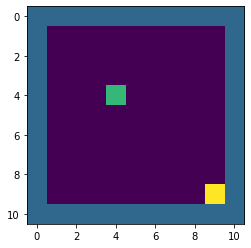

In [18]:
plt.imshow(env.reset())

In [19]:
model = PPO.load('../agents/ppo/EmptyMaze-10x10-FixedGoal-NonTerminating-v0_1/best_model.zip')

In [20]:
images = []
for n in range(30):
    obs = env.reset()
    for _ in range(1000):
        action, _states = model.predict(obs, deterministic=False)
        obs, reward, done, info = env.step(action)
        if done:
            break
        frame = env.get_image()
        images.append(frame)

imageio.mimsave(f'tmp/PPO-EmptyMaze-v0-rollout.gif', images, fps=29)
Image(filename=f"tmp/PPO-EmptyMaze-v0-rollout.gif", width=110, height=110)

In [21]:
discrim = th.load('../../imitation/output/train_adversarial/mazelab:EmptyMaze-10x10-FixedGoal-NonTerminating-v0/20200801_141438_64f5ae/checkpoints/final/discrim.pt')


In [24]:
obs = env.reset()
for _ in range(50):
    obs_prev = obs
    action, _states = model.predict(obs, deterministic=False)
    obs, reward, done, info = env.step(action)
    state = np.expand_dims(obs_prev, axis=0)
    next_state = np.expand_dims(obs, axis=0)
    print(discrim.predict_reward_test(state, np.array([action]), next_state, done=done))
    if done:
        break

[-18.63745]
[-18.262432]
[-18.74629]
[-17.724298]
[-18.047953]
[-18.359653]
[-18.162573]
[-17.918621]
[-18.001602]
[-18.069477]
[-17.5171]
[-17.674925]
[-17.807646]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-19.867022]
[-17.627556]
[-18.948315]
[-17.720224]
[-19.867022]
[-17.627556]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-19.867022]
[-17.627556]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]
[-18.948315]
[-17.720224]


# Hmm this seems uninteresting too. Let's load up a reward function only of the state

In [25]:
discrim = th.load('../../imitation/output/train_adversarial/mazelab:EmptyMaze-10x10-FixedGoal-NonTerminating-v0/20200801_142907_41b7c9/checkpoints/final/discrim.pt')


In [35]:
obs = env.reset()
for _ in range(50):
    obs_prev = obs
    action, _states = model.predict(obs, deterministic=False)
    obs, reward, done, info = env.step(action)
    state = np.expand_dims(obs_prev, axis=0)
    next_state = np.expand_dims(obs, axis=0)
    print(discrim.predict_reward_test(state, np.array([action]), next_state, done=done))
    if done:
        break

[-14.785751]
[-15.240146]
[-14.960959]
[-14.790281]
[-14.785751]
[-14.993195]
[-15.22703]
[-14.739197]
[-14.764002]
[-14.512451]
[-14.549238]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-13.896341]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-13.896341]
[-13.896341]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-13.896341]
[-15.298563]
[-13.896341]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
[-14.549238]
[-15.298563]
